In [1]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(0, '../src/')

In [4]:
from logger import LogData, TemporalLogger, EnvLogger
from utils import plot_typography

In [5]:
plot_typography(False, 12, 14, 16)

In [6]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log_good_results")
envs =  ["PongNoFrameskip-v0", "PongNoFrameskip-v4",
         "BreakoutNoFrameskip-v0", "BreakoutNoFrameskip-v4",
         "SeaquestNoFrameskip-v0", "SeaquestNoFrameskip-v4"]
cols = ['attention_target', 'attention_type', 'env_name', 
        'timestamp', 'mean_reward',
       'mean_feat_std', 'mean_proxy']
decimate = 100


def figure_factory(log_dir, env, variant, rew_scale=5, feat_scale=1, decimate=100, save=True, loc_feat=1, loc_rwd=4):
    # sanity check
    if variant not in [0,4]:
        raise ValueError(f"Invalid variant, got {variant}, should be 0 or 4")
    
    # load data 
    el = EnvLogger(f"{env}NoFrameskip-v{variant}", log_dir, decimate)

    # plot
    el.plot_rewards(save=save, y_inset_std_scale=rew_scale, loc=loc_rwd)
    el.plot_feat_std(save=save, y_inset_std_scale=feat_scale, loc=loc_feat)


In [9]:
figure_factory(log_dir, "Pong", 4, 5, 1, 100, save=True, loc_rwd=4, loc_feat=1)

FileNotFoundError: [Errno 2] File b'C:\\Users\\Reizinger Patrik\\Documents\\GitHub\\AttA2C\\log_good_results\\PongNoFrameskip-v4\\params.tsv' does not exist: b'C:\\Users\\Reizinger Patrik\\Documents\\GitHub\\AttA2C\\log_good_results\\PongNoFrameskip-v4\\params.tsv'

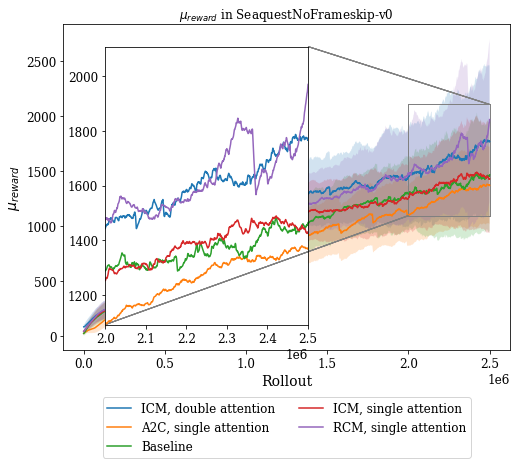

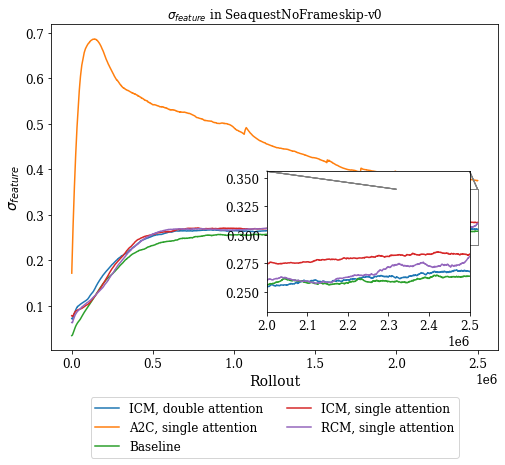

In [10]:
figure_factory(log_dir, "Seaquest", 0, 2.2, 1.5, 100, save=True, loc_rwd=2, loc_feat=4)

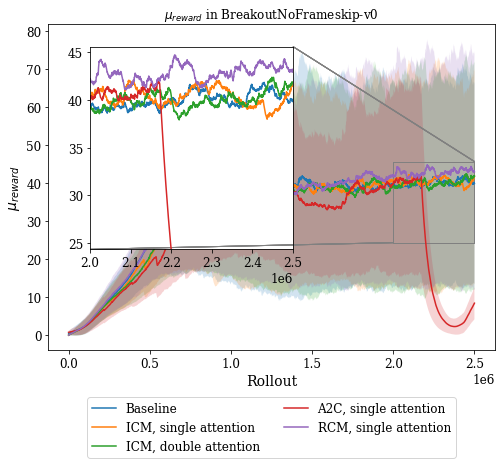

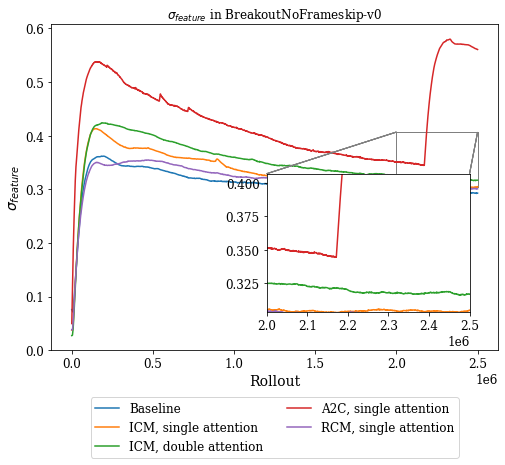

In [11]:
figure_factory(log_dir, "Breakout", 0, .8, .5, 100, save=True, loc_rwd=2, loc_feat=4)

In [ ]:
el = EnvLogger("PongNoFrameskip-v4", log_dir, decimate)

In [ ]:
el.params_df[cols].sort_values(by=["mean_reward", "mean_proxy"], ascending=False)#.loc[el.params_df.timestamp == '2019-07-20 10_21_45']

In [ ]:
el.plot_mean_std(*["rewards"])

In [ ]:
el.plot_mean_std(*["features"])

In [ ]:
el.plot_proxy()

In [ ]:
el.plot_rewards()

In [ ]:
el.plot_feat_std()